### SQl + Python

In [5]:
import mysql.connector
import pandas as pd

In [ ]:
# connect to the DB
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
    #port='8889',
  passwd="*******",
  database="polar7_test"
)

In [56]:
# Check the DB  tables
mycursor = mydb.cursor()

mycursor.execute("Show tables;")
  
myresult = mycursor.fetchall()
  
for x in myresult:
    print(x)

('Client',)
('Product',)
('Product_type',)
('Purchases',)
('Purchases1',)
('Shop',)


In [57]:
# Instert data into tables

sql = "INSERT IGNORE INTO Product_type (type) VALUES ('Fruit'),('Vegetable'),('Nuts'),('Fish'),('Shellfish'),('Seafood'),('Liquor'),('Soft_drink'),('Wine')"

    
mycursor.execute(sql)

mydb.commit()

print(mycursor.rowcount, "was inserted.") 

0 was inserted.


In [58]:
sql1 = """
INSERT IGNORE INTO Product (product, price, Product_type_prod_typeID) VALUES
    ( 'Pears','2.9', (SELECT prod_typeID from Product_type WHERE type='Fruit') ),
    ( 'Oranges', '2.5', (SELECT prod_typeID from Product_type WHERE type='Fruit' ) ),
    ( 'Green beans', '4.5', (SELECT prod_typeID from Product_type WHERE type='Vegetable' ) ),
    ( 'Potatoes', '2.5', (SELECT prod_typeID from Product_type WHERE type='Vegetable' ) ),
    ( 'Wallnuts', '7.5', (SELECT prod_typeID from Product_type WHERE type='Nuts' ) ),
    ( 'Pistachios', '14.5', (SELECT prod_typeID from Product_type WHERE type='Nuts' ) ),
    ( 'Cod', '10.5', (SELECT prod_typeID from Product_type WHERE type='Fish' ) ),
    ( 'Sea Bass', '13.5', (SELECT prod_typeID from Product_type WHERE type='Fish' ) ),
    ( 'Mussels', '9.0', (SELECT prod_typeID from Product_type WHERE type='Shellfish' ) ),
    ( 'Clams', '6.5', (SELECT prod_typeID from Product_type WHERE type='Shellfish' ) ),
    ( 'Octopus', '11.0', (SELECT prod_typeID from Product_type WHERE type='Seafood' ) ),
    ( 'Squid', '7.0', (SELECT prod_typeID from Product_type WHERE type='Seafood' ) ),
    ( 'Tia Maria', '21.0', (SELECT prod_typeID from Product_type WHERE type='Liquor' ) ),
    ( 'Limoncello', '15.5', (SELECT prod_typeID from Product_type WHERE type='Liquor' ) ),
    ( 'Tonic Water', '3.5', (SELECT prod_typeID from Product_type WHERE type='Soft_drink' ) ),
    ( 'Soda', '2.5', (SELECT prod_typeID from Product_type WHERE type='Soft_drink' ) ),
    ( 'Turbio', '2.5', (SELECT prod_typeID from Product_type WHERE type='Wine' ) ),
    ( 'Muga', '4.0', (SELECT prod_typeID from Product_type WHERE type='Wine' ) )
"""

mycursor.execute(sql1)

mydb.commit()

print(mycursor.rowcount, "was inserted.") 


0 was inserted.


In [59]:
# Insert clients

sql = "INSERT IGNORE INTO Client (name, surname, age) VALUES (%s, %s, %s)"
val = [
    ('Robert', 'Smith', '53' ),
    ('Beth', 'Gibbons', '44' ),
    ('Max', 'Ritter', '28' ),
    ('Jo', 'Grant', '62' ),
]
mycursor.executemany(sql, val)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

4 record(s) inserted.


In [60]:
# Insert shops

sql = "INSERT IGNORE INTO Shop (name,type,address,area ) VALUES (%s, %s, %s, %s)"
val = [
    ('Fresh', 'Fruit & Vegetable', 'Jamestown Road, 5','75' ),
    ('Nemo', 'Fish Mongers', 'Tottenham COurt Road, 124','56' ),
    ('Beat Box', 'Wine & Liquor', 'Charlottes Street, 32','63' ),
    ('Superama', 'Supermarket', 'Culiacan 40','725' ),
]
mycursor.executemany(sql, val)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

0 record(s) inserted.


In [61]:
mycursor.execute("SELECT * FROM Client")
result = mycursor.fetchall()
print('CLIENT')
for row in result:
    print(row)
    
mycursor.execute("SELECT * FROM Product")
result = mycursor.fetchall()
print('PRODUCT')
for row in result:
    print(row)
    
mycursor.execute("SELECT * FROM Shop")
result = mycursor.fetchall()
print('SHOPS')
for row in result:
    print(row)

CLIENT
(17, 'Robert', 'Smith', 53)
(18, 'Beth', 'Gibbons', 44)
(19, 'Max', 'Ritter', 28)
(20, 'Jo', 'Grant', 62)
(21, 'Robert', 'Smith', 53)
(22, 'Beth', 'Gibbons', 44)
(23, 'Max', 'Ritter', 28)
(24, 'Jo', 'Grant', 62)
PRODUCT
(88, 'Pears', Decimal('2.90'), 1)
(89, 'Oranges', Decimal('2.50'), 1)
(90, 'Green beans', Decimal('4.50'), 2)
(91, 'Potatoes', Decimal('2.50'), 2)
(92, 'Wallnuts', Decimal('7.50'), 3)
(93, 'Pistachios', Decimal('14.50'), 3)
(94, 'Cod', Decimal('10.50'), 4)
(95, 'Sea Bass', Decimal('13.50'), 4)
(96, 'Mussels', Decimal('9.00'), 5)
(97, 'Clams', Decimal('6.50'), 5)
(98, 'Octopus', Decimal('11.00'), 6)
(99, 'Squid', Decimal('7.00'), 6)
(100, 'Tia Maria', Decimal('21.00'), 7)
(101, 'Limoncello', Decimal('15.50'), 7)
(102, 'Tonic Water', Decimal('3.50'), 8)
(103, 'Soda', Decimal('2.50'), 8)
(104, 'Turbio', Decimal('2.50'), 9)
(105, 'Muga', Decimal('4.00'), 9)
SHOPS
(1, 'Fresh', 'Fruit & Vegetab', 'Jamestown Road, 5', 75)
(2, 'Nemo', 'Fish Mongers', 'Tottenham COurt Roa

mysql> INSERT INTO joke(joke_text, joke_date, author_id)
    -> VALUES (‘Humpty Dumpty had a great fall.’, ‘1899–03–13’, (SELECT id FROM author WHERE author_name = ‘Famous Anthony’));

In [62]:

# Insert Ticket 1

sql = """
INSERT IGNORE INTO Purchases (tktcode,date,quantity,price,Client_ClientID,Product_productID,Shop_shopID ) VALUES 
('tk1', '2021-08-18', '10',
(SELECT price FROM Product WHERE product = 'Pears'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Pears'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '1',
(SELECT price FROM Product WHERE product = 'Green beans'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Green beans'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '2',
(SELECT price FROM Product WHERE product = 'Potatoes'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Potatoes'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '1',
(SELECT price FROM Product WHERE product = 'Cod'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Cod'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '10',
(SELECT price FROM Product WHERE product = 'Tonic Water'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Tonic Water'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '15',
(SELECT price FROM Product WHERE product = 'Soda'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Soda'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '2',
(SELECT price FROM Product WHERE product = 'Turbio'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Turbio'),(SELECT shopID from Shop WHERE name='Superama')),

('tk1', '2021-08-18', '3',
(SELECT price FROM Product WHERE product = 'Muga'),(SELECT ClientID from Client WHERE name='Robert'),
(SELECT productID from Product WHERE product='Muga'),(SELECT shopID from Shop WHERE name='Superama'))

"""
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

0 record(s) inserted.


In [63]:
# Insert Ticket 2

sql = """
INSERT IGNORE INTO Purchases (tktcode,date,quantity,price,Client_ClientID,Product_productID,Shop_shopID ) VALUES 
('tk2', '2021-08-17', '10',
(SELECT price FROM Product WHERE product = 'Pears'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Pears'),(SELECT shopID from Shop WHERE name='Fresh')),

('tk2', '2021-08-17', '10',
(SELECT price FROM Product WHERE product = 'Oranges'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Oranges'),(SELECT shopID from Shop WHERE name='Fresh')),

('tk2', '2021-08-17', '10',
(SELECT price FROM Product WHERE product = 'Green beans'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Green beans'),(SELECT shopID from Shop WHERE name='Fresh')),

('tk2', '2021-08-17', '10',
(SELECT price FROM Product WHERE product = 'Potatoes'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Potatoes'),(SELECT shopID from Shop WHERE name='Fresh')),

('tk2', '2021-08-17', '10',
(SELECT price FROM Product WHERE product = 'Wallnuts'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Wallnuts'),(SELECT shopID from Shop WHERE name='Fresh'))

"""
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

0 record(s) inserted.


In [64]:
# Insert Ticket 3

sql = """
INSERT IGNORE INTO Purchases (tktcode,date,quantity,price,Client_ClientID,Product_productID,Shop_shopID ) VALUES 
('tk3', '2021-08-15', '1',
(SELECT price FROM Product WHERE product = 'Cod'),(SELECT ClientID from Client WHERE name='Jo'),
(SELECT productID from Product WHERE product='Cod'),(SELECT shopID from Shop WHERE name='Nemo')),

('tk3', '2021-08-15', '4',
(SELECT price FROM Product WHERE product = 'Mussels'),(SELECT ClientID from Client WHERE name='Jo'),
(SELECT productID from Product WHERE product='Mussels'),(SELECT shopID from Shop WHERE name='Nemo')),

('tk3', '2021-08-15', '2',
(SELECT price FROM Product WHERE product = 'Squid'),(SELECT ClientID from Client WHERE name='Jo'),
(SELECT productID from Product WHERE product='Squid'),(SELECT shopID from Shop WHERE name='Nemo'))

"""
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

0 record(s) inserted.


In [65]:
# Insert Ticket 4

sql = """
INSERT IGNORE INTO Purchases (tktcode,date,quantity,price,Client_ClientID,Product_productID,Shop_shopID ) VALUES 
('tk4', '2021-08-16', '15',
(SELECT price FROM Product WHERE product = 'Tonic Water'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Tonic Water'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '10',
(SELECT price FROM Product WHERE product = 'Soda'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Soda'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '2',
(SELECT price FROM Product WHERE product = 'Tia Maria'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Tia Maria'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '3',
(SELECT price FROM Product WHERE product = 'Octopus'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Octopus'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '2',
(SELECT price FROM Product WHERE product = 'Cod'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Cod'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '8',
(SELECT price FROM Product WHERE product = 'Potatoes'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Potatoes'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '4',
(SELECT price FROM Product WHERE product = 'Green beans'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Green beans'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', '6',
(SELECT price FROM Product WHERE product = 'Oranges'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Oranges'),(SELECT shopID from Shop WHERE name='Superama')),

('tk4', '2021-08-16', 9,
(SELECT price FROM Product WHERE product = 'Pears'),(SELECT ClientID from Client WHERE name='Max'),
(SELECT productID from Product WHERE product='Pears'),(SELECT shopID from Shop WHERE name='Superama'))

"""
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

0 record(s) inserted.


In [66]:
# Insert Ticket 5

sql = """
INSERT IGNORE INTO Purchases (tktcode,date,quantity,price,Client_ClientID,Product_productID,Shop_shopID ) VALUES 
('tk5', '2021-08-18', '5',
(SELECT price FROM Product WHERE product = 'Muga'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Muga'),(SELECT shopID from Shop WHERE name='Beat Box')),
('tk5', '2021-08-18', '9',
(SELECT price FROM Product WHERE product = 'Turbio'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Turbio'),(SELECT shopID from Shop WHERE name='Beat Box')),
('tk5', '2021-08-18', '15',
(SELECT price FROM Product WHERE product = 'Soda'),(SELECT ClientID from Client WHERE name='Beth'),
(SELECT productID from Product WHERE product='Soda'),(SELECT shopID from Shop WHERE name='Beat Box'))



"""
mycursor.execute(sql)
mydb.commit()
print(mycursor.rowcount, "record(s) inserted.")

0 record(s) inserted.


##### Convert to Pandas DB

In [79]:
dbtot = pd.read_sql("""
            SELECT tktcode,Shop_shopID,date,Client_ClientID,Product_productID,price,quantity,Subtotal
            FROM Purchases
            ORDER BY tktcode
            """, con = mydb)# return your first five rows
dbtot.head()

,tktcode,Shop_shopID,date,Client_ClientID,Product_productID,price,quantity,Subtotal
0,tk1,4,2021-08-18,17,88,2.9,10,29.0
1,tk1,4,2021-08-18,17,90,4.5,1,4.5
2,tk1,4,2021-08-18,17,91,2.5,2,5.0
3,tk1,4,2021-08-18,17,94,10.5,1,10.5
4,tk1,4,2021-08-18,17,102,3.5,10,35.0


SELECT Purchases.quantity, Purchases.date, Client.name, Client.surname
FROM Purchases,Client 
WHERE Purchases.Client_ClientID=Client.ClientID

In [75]:
#dataframe with clients names
dbnames = pd.read_sql("""
            SELECT  Client.name, Client.surname FROM Purchases,Client 
            WHERE Purchases.Client_ClientID=Client.ClientID
            
            ORDER BY tktcode
            """, con = mydb)

dbnames.head()

,name,surname
0,Robert,Smith
1,Robert,Smith
2,Robert,Smith
3,Robert,Smith
4,Robert,Smith


In [76]:
#dataframe with product names
dbprod = pd.read_sql("""
            SELECT  Product.product FROM Purchases,Product 
            WHERE Product.productID=Purchases.Product_productID
            ORDER BY tktcode
            """, con = mydb)

dbprod.head()

,product
0,Pears
1,Green beans
2,Potatoes
3,Cod
4,Tonic Water


In [77]:
#dataframe with shop names
dbshop = pd.read_sql("""
           SELECT  Shop.name, Shop.type FROM Purchases,Shop 
WHERE Shop.shopID=Purchases.Shop_shopID
ORDER BY tktcode
            """, con = mydb)

dbshop.head()

,name,type
0,Superama,Supermarket
1,Superama,Supermarket
2,Superama,Supermarket
3,Superama,Supermarket
4,Superama,Supermarket


##### Concat the previous dataframes to get the clients, product.. names instead of foreign key

In [126]:
df = pd.concat([dbtot, dbnames,dbprod,dbshop], axis=1)
df.head()

,tktcode,Shop_shopID,date,Client_ClientID,Product_productID,price,quantity,Subtotal,name,surname,product,name,type
0,tk1,4,2021-08-18,17,88,2.9,10,29.0,Robert,Smith,Pears,Superama,Supermarket
1,tk1,4,2021-08-18,17,90,4.5,1,4.5,Robert,Smith,Green beans,Superama,Supermarket
2,tk1,4,2021-08-18,17,91,2.5,2,5.0,Robert,Smith,Potatoes,Superama,Supermarket
3,tk1,4,2021-08-18,17,94,10.5,1,10.5,Robert,Smith,Cod,Superama,Supermarket
4,tk1,4,2021-08-18,17,102,3.5,10,35.0,Robert,Smith,Tonic Water,Superama,Supermarket


In [127]:
df=df.drop(columns=['Shop_shopID','Client_ClientID','Product_productID'],axis=1)
df.columns=['tktcode','date','price','quantity','Subtotal','name','surname','product','shop','shop_type']
df.head()

,tktcode,date,price,quantity,Subtotal,name,surname,product,shop,shop_type
0,tk1,2021-08-18,2.9,10,29.0,Robert,Smith,Pears,Superama,Supermarket
1,tk1,2021-08-18,4.5,1,4.5,Robert,Smith,Green beans,Superama,Supermarket
2,tk1,2021-08-18,2.5,2,5.0,Robert,Smith,Potatoes,Superama,Supermarket
3,tk1,2021-08-18,10.5,1,10.5,Robert,Smith,Cod,Superama,Supermarket
4,tk1,2021-08-18,3.5,10,35.0,Robert,Smith,Tonic Water,Superama,Supermarket


In [128]:
df["Client"] = df["name"].astype(str) + ' ' + df["surname"].astype(str)
df.drop(columns=['name','surname'], inplace=True)
df['Prod_type']=''
df.head()

,tktcode,date,price,quantity,Subtotal,product,shop,shop_type,Client,Prod_type
0,tk1,2021-08-18,2.9,10,29.0,Pears,Superama,Supermarket,Robert Smith,
1,tk1,2021-08-18,4.5,1,4.5,Green beans,Superama,Supermarket,Robert Smith,
2,tk1,2021-08-18,2.5,2,5.0,Potatoes,Superama,Supermarket,Robert Smith,
3,tk1,2021-08-18,10.5,1,10.5,Cod,Superama,Supermarket,Robert Smith,
4,tk1,2021-08-18,3.5,10,35.0,Tonic Water,Superama,Supermarket,Robert Smith,


In [55]:
# Add the food type

def prodtype(m):
    if (m =='Pears' or m =='Oranges'):
        m='Fruit'
    elif (m =='Green beans' or m =='Potatoes'):
        m='Vegetable'
    elif (m =='Wallnuts' or m =='Pistachios'):
        m='Nuts'
    elif (m =='Cod' or m =='Sea Bass'):
        m='Fish'
    elif (m =='Mussels' or m =='Clams'):
        m='Shellfish'
    elif (m =='Octopus' or m =='Squid'):
        m='Seafood'
    elif (m =='Tia Maria' or m =='Limoncello'):
        m='Liquor'
    elif (m =='Tonic Water' or m =='Soda'):
        m='Soft_drink'
    elif (m =='Turbio' or m =='Muga'):
        m='Wine'
    return m

df['Prod_type'] = df['product'].apply(prodtype)

In [159]:
df.head()

,tktcode,date,price,quantity,Subtotal,product,shop,shop_type,Client,Prod_type
0,tk1,2021-08-18,2.9,10,29.0,Pears,Superama,Supermarket,Robert Smith,Fruit
1,tk1,2021-08-18,4.5,1,4.5,Green beans,Superama,Supermarket,Robert Smith,Vegetable
2,tk1,2021-08-18,2.5,2,5.0,Potatoes,Superama,Supermarket,Robert Smith,Vegetable
3,tk1,2021-08-18,10.5,1,10.5,Cod,Superama,Supermarket,Robert Smith,Fish
4,tk1,2021-08-18,3.5,10,35.0,Tonic Water,Superama,Supermarket,Robert Smith,Soft_drink


In [161]:
df.to_csv('shopping.csv')

In [10]:
#reload the generated database t

df = pd.read_csv('shopping.csv', engine = 'python')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(20)

,tktcode,date,price,quantity,Subtotal,product,shop,shop_type,Client,Prod_type
0,tk1,2021-08-18,2.9,10,29.0,Pears,Superama,Supermarket,Robert Smith,Fruit
1,tk1,2021-08-18,4.5,1,4.5,Green beans,Superama,Supermarket,Robert Smith,Vegetable
2,tk1,2021-08-18,2.5,2,5.0,Potatoes,Superama,Supermarket,Robert Smith,Vegetable
3,tk1,2021-08-18,10.5,1,10.5,Cod,Superama,Supermarket,Robert Smith,Fish
4,tk1,2021-08-18,3.5,10,35.0,Tonic Water,Superama,Supermarket,Robert Smith,Soft_drink
5,tk1,2021-08-18,2.5,15,37.5,Soda,Superama,Supermarket,Robert Smith,Soft_drink
6,tk1,2021-08-18,2.5,2,5.0,Turbio,Superama,Supermarket,Robert Smith,Wine
7,tk1,2021-08-18,4.0,3,12.0,Muga,Superama,Supermarket,Robert Smith,Wine
8,tk2,2021-08-17,2.9,10,29.0,Pears,Fresh,Fruit & Vegetab,Beth Gibbons,Fruit
9,tk2,2021-08-17,2.5,10,25.0,Oranges,Fresh,Fruit & Vegetab,Beth Gibbons,Fruit


##### Some features simple representations

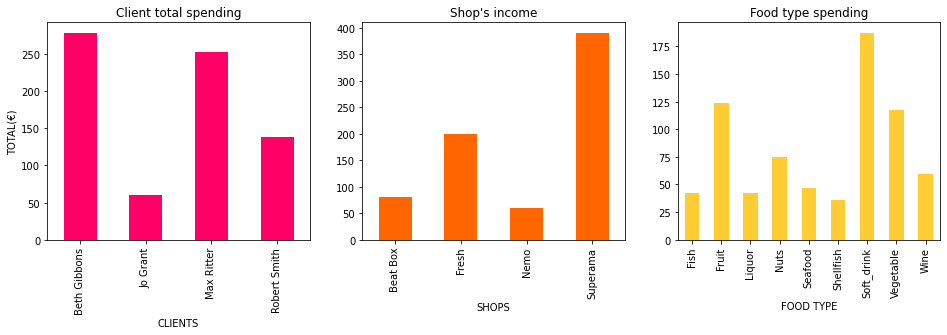

In [54]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3, figsize=(16,4))

df.groupby('Client')['Subtotal'].sum().plot(kind='bar',color='#ff0066',ylabel='TOTAL(€)',xlabel='CLIENTS',
                                            title='Client total spending',ax=ax[0])
df.groupby('shop')['Subtotal'].sum().plot(kind='bar',color='#ff6600',xlabel='SHOPS',
                                            title='Shop\'s income',ax=ax[1])
df.groupby('Prod_type')['Subtotal'].sum().plot(kind='bar',color='#ffcc33',xlabel='FOOD TYPE',
                                            title='Food type spending',ax=ax[2])

